In [53]:
# Cell 1: Import necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

# Confirm imports
print("Libraries imported successfully.")

Libraries imported successfully.


In [54]:
# Cell 2: Load the data
file_path = r'C:\Users\TanMeh\Desktop\jupyter\to code - Copy.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the input columns
input_columns = ['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR', 'D_DESTYCOOR', 'D_HREDE']
X = data[input_columns]

print("Data loaded successfully. Sample data:")
display(data.head())  # Display sample data for confirmation

Data loaded successfully. Sample data:


,P_SEXE,P_GRAGE,D_ORIXCOOR,D_ORIYCOOR,D_DESTXCOOR,D_DESTYCOOR,D_HREDE
0,1,14,291500,5045500,291500,5045500,930
1,1,14,291500,5045500,291500,5045500,1030
2,1,14,291500,5045500,292500,5045500,1200
3,1,14,292500,5045500,291500,5045500,1300
4,1,14,291500,5045500,291500,5045500,1400


In [55]:
# Cell 3: Scaling for continuous variables to maintain min-max levels
scalers = {}
min_max_values = {}  # Store original min and max values

X_scaled = X.copy()  # Create a copy of X to avoid warnings

for col in input_columns:
    scaler = MinMaxScaler()
    X_scaled[[col]] = scaler.fit_transform(X_scaled[[col]].astype(float))
    scalers[col] = scaler  # Store the scaler for later inverse transformation
    min_max_values[col] = (X[col].min(), X[col].max())  # Save min and max values

print("Data scaled successfully. Sample scaled data:")
display(X_scaled.head())  # Display sample scaled data for confirmation

Data scaled successfully. Sample scaled data:


,P_SEXE,P_GRAGE,D_ORIXCOOR,D_ORIYCOOR,D_DESTXCOOR,D_DESTYCOOR,D_HREDE
0,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.329749
1,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.365591
2,0.0,0.857143,0.485000,0.983239,0.486667,0.983239,0.426523
3,0.0,0.857143,0.486667,0.983239,0.485000,0.983239,0.462366
4,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.498208


In [56]:
# Cell 4: Split data for training
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print("Data split into training and test sets.")


Data split into training and test sets.


In [57]:
# Cell 5: Define the neural network model with increased complexity
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(X_train.shape[1])  # Output layer matches the number of input columns
])

# Enhanced custom loss function to improve distribution matching without tf.unique
def enhanced_distribution_loss(y_true, y_pred):
    # Calculate mean squared error
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Calculate mean and standard deviation penalties to match distribution
    mean_loss = tf.reduce_mean(tf.square(tf.reduce_mean(y_true, axis=0) - tf.reduce_mean(y_pred, axis=0)))
    std_loss = tf.reduce_mean(tf.square(tf.math.reduce_std(y_true, axis=0) - tf.math.reduce_std(y_pred, axis=0)))
    
    # Combine all losses for better distribution matching
    return mse_loss + 0.5 * mean_loss + 0.5 * std_loss

model.compile(optimizer='adam', loss=enhanced_distribution_loss)
print("Model defined and compiled with enhanced distribution loss.")    

Model defined and compiled with enhanced distribution loss.


In [58]:
# Cell 6: Train the model
history = model.fit(X_train, X_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
print("Model training complete.")


Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1175141613568.0000 - val_loss: 14820733.0000
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17402630.0000 - val_loss: 14379058.0000
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24935828.0000 - val_loss: 12663006.0000
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15999844.0000 - val_loss: 10911014.0000
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15540219.0000 - val_loss: 17980382.0000
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21224474.0000 - val_loss: 23561566.0000
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20915772.0000 - val_loss: 35584728.0000
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43179664.0000 - val_loss: 20991428.0000
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19528514.0000 - val_loss: 25725530.0000
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41865532.0000 - val_loss: 16915864

In [59]:
# Cell 7: Generate synthetic data
generated_data = model.predict(X)
generated_df = pd.DataFrame(generated_data, columns=input_columns)
print("Synthetic data generated.")


381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Synthetic data generated.


In [60]:
# Cell 8: Post-process the generated data - inverse scaling to original range
for col in input_columns:
    # Inverse transform to original range
    generated_df[[col]] = scalers[col].inverse_transform(generated_df[[col]])

    # Enforce min and max values explicitly, then cast to original data type
    min_val, max_val = min_max_values[col]
    generated_df[col] = generated_df[col].clip(lower=min_val, upper=max_val).astype(data[col].dtype)

print("Data inverse transformed, min-max enforced, and types matched. Sample generated data:")
display(generated_df.head())




Data inverse transformed, min-max enforced, and types matched. Sample generated data:


,P_SEXE,P_GRAGE,D_ORIXCOOR,D_ORIYCOOR,D_DESTXCOOR,D_DESTYCOOR,D_HREDE
0,2,2,600500,5131500,600500,5131500,2800
1,2,2,600500,5131500,600500,5131500,2800
2,2,2,600500,5131500,600500,5131500,2800
3,2,2,600500,5131500,600500,5131500,2800
4,2,2,600500,5131500,600500,5131500,2800


In [61]:
# Cell 9: Rounding to nearest integer for discrete columns if necessary
discrete_columns = ['P_SEXE', 'P_GRAGE', 'D_HREDE']
for col in discrete_columns:
    generated_df[col] = generated_df[col].round().astype(int)
print("Discrete columns rounded.")


Discrete columns rounded.


In [62]:
# Cell 10: Ensure data fits within min and max of the original data
for col in input_columns:
    generated_df[col] = generated_df[col].clip(lower=data[col].min(), upper=data[col].max())
print("Data clipped to original range.")


Data clipped to original range.


In [63]:
# Cell 11: Display the generated synthetic data
print("Generated Data Sample:")
display(generated_df.head())  # Display sample generated data


Generated Data Sample:


,P_SEXE,P_GRAGE,D_ORIXCOOR,D_ORIYCOOR,D_DESTXCOOR,D_DESTYCOOR,D_HREDE
0,2,2,600500,5131500,600500,5131500,2800
1,2,2,600500,5131500,600500,5131500,2800
2,2,2,600500,5131500,600500,5131500,2800
3,2,2,600500,5131500,600500,5131500,2800
4,2,2,600500,5131500,600500,5131500,2800


In [64]:
# Cell 12: Save generated data to CSV
output_file_path = r'C:\Users\TanMeh\Desktop\jupyter\generated_data.csv'
generated_df.to_csv(output_file_path, index=False)
print(f"Generated data has been saved to '{output_file_path}'")


Generated data has been saved to 'C:\Users\TanMeh\Desktop\jupyter\generated_data.csv'


In [65]:
# Cell 13: Frequency distribution analysis for generated data
print("Frequency distributions of generated data:")

# Display frequency distribution for each column in generated data
for col in generated_df.columns:
    print(f"\nFrequency distribution for {col}:")
    print(generated_df[col].value_counts(normalize=True).sort_index())


Frequency distributions of generated data:

Frequency distribution for P_SEXE:
P_SEXE
1    0.019959
2    0.980041
Name: proportion, dtype: float64

Frequency distribution for P_GRAGE:
P_GRAGE
2     0.995811
16    0.004189
Name: proportion, dtype: float64

Frequency distribution for D_ORIXCOOR:
D_ORIXCOOR
500       0.004517
600500    0.995483
Name: proportion, dtype: float64

Frequency distribution for D_ORIYCOOR:
D_ORIYCOOR
500        0.001314
5131500    0.998686
Name: proportion, dtype: float64

Frequency distribution for D_DESTXCOOR:
D_DESTXCOOR
600500    1.0
Name: proportion, dtype: float64

Frequency distribution for D_DESTYCOOR:
D_DESTYCOOR
500        0.003285
5131500    0.996715
Name: proportion, dtype: float64

Frequency distribution for D_HREDE:
D_HREDE
10      0.011006
1777    0.000082
2800    0.988912
Name: proportion, dtype: float64


Visualizing frequency distributions of generated data:


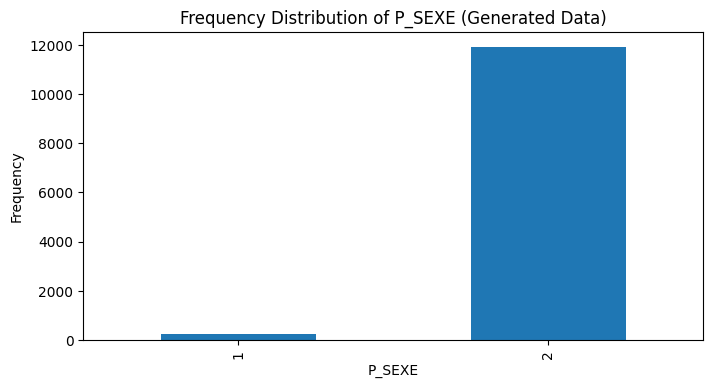

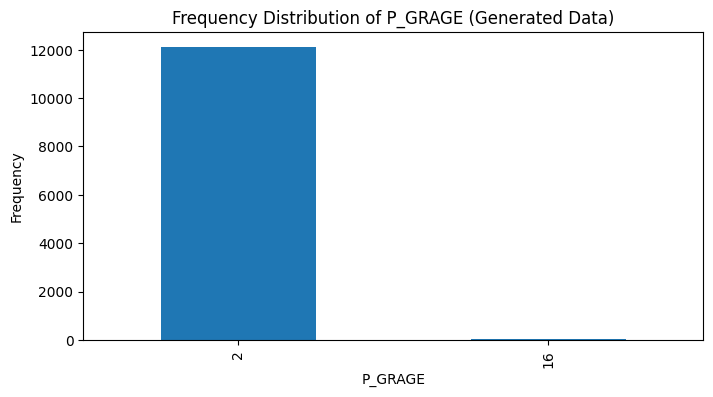

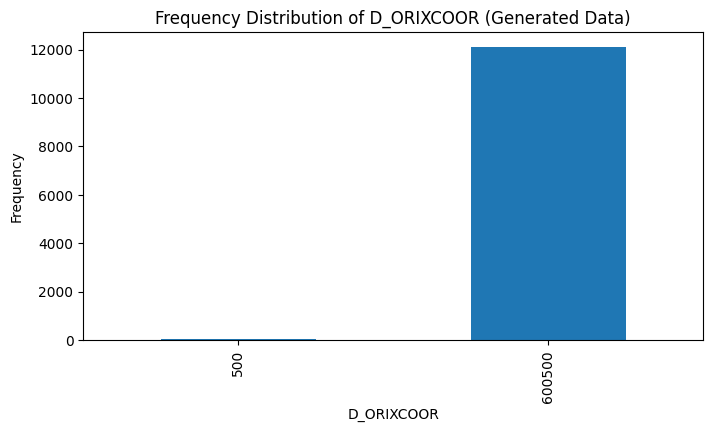

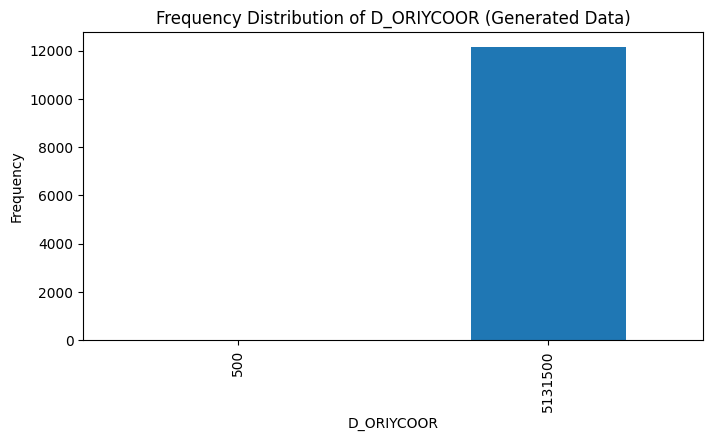

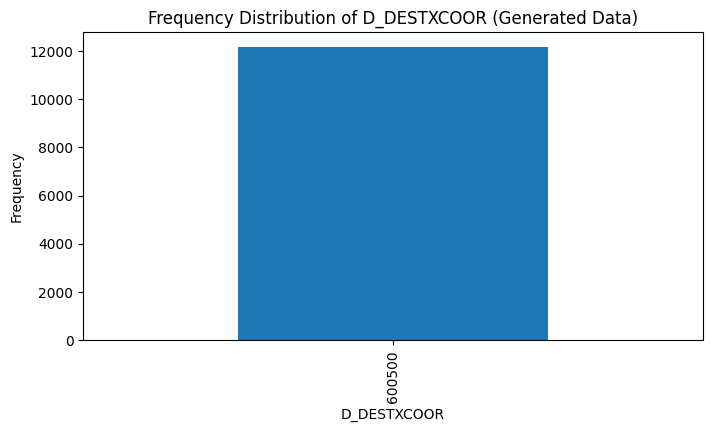

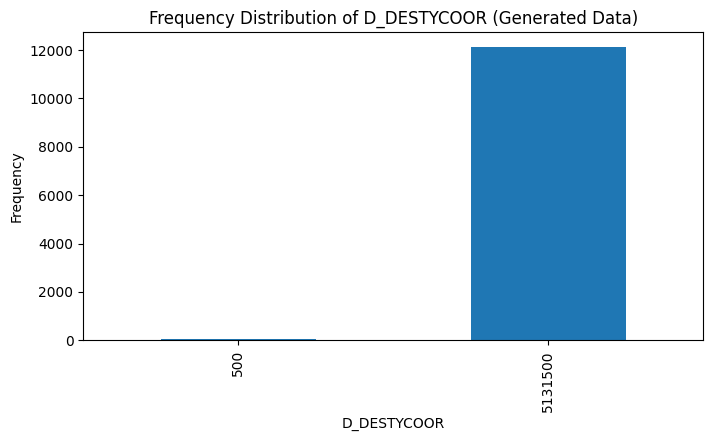

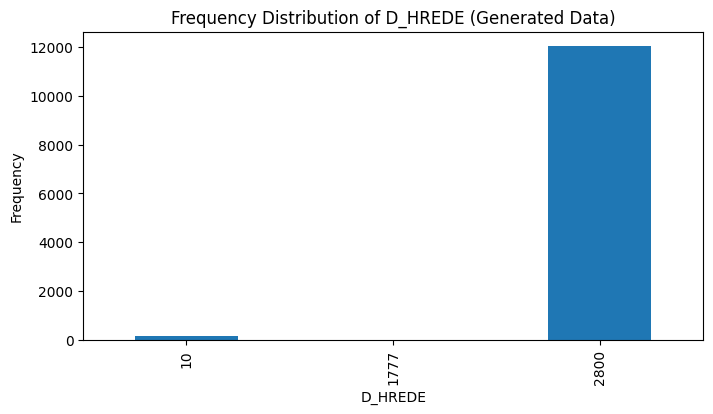

In [66]:
# Cell 14: Visualize frequency distributions of generated data
import matplotlib.pyplot as plt

print("Visualizing frequency distributions of generated data:")

for col in generated_df.columns:
    plt.figure(figsize=(8, 4))
    
    # Check if the data is likely categorical (integer type with fewer unique values)
    if pd.api.types.is_integer_dtype(generated_df[col]) and generated_df[col].nunique() < 20:
        # Categorical data - bar chart
        generated_df[col].value_counts().sort_index().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Frequency Distribution of {col} (Generated Data)')
    else:
        # Continuous data - histogram
        plt.hist(generated_df[col], bins=20, alpha=0.7, edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Frequency Distribution of {col} (Generated Data)')
    
    plt.show()
